# Exercises for EBT617E - Week 2

## Bloch Theorem

An energy eigenstate in a periodic potential can be written as 

$$ \Psi_k(z) = \mathrm{e}^{ikz} u_k(z) $$

Since the potential $V(z)$ and the $u_k(z)$ functions are periodic in $z$ with period $a$, they can be written as a Fourier series

$$ V(z) = V(z+a) = \sum_n V_n \mathrm{e}^{i2\pi n z /a} \qquad \mathrm{and} \qquad  u_k(z) = \sum_n u_{k,n} \mathrm{e}^{i2\pi n z/a} $$

The Schrödinger equation 

$$ \left[ \frac{\hbar^2 \mathrm{d}^2}{2m \mathrm{d}z^2} + V(z) \right] \Psi_k(z) = E_k \Psi_k(z) $$

can be written in Fourier space as 

$$  \frac{\hbar^2 (k+G_n)^2}{2m}u_{k,n} + \sum_m V_m u_{k,n-m} = E_k u_{k,n} $$

where $G_n = \frac{2\pi}{a} n$ are the reciprocal lattice vectors.

Scaling:

$$ z' = z / a, \qquad k' = ka, \qquad E' = E / (\hbar^2/2ma^2) $$

In [139]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [140]:
# k in [-pi,pi]
def ϵkG(k,n):
    G = 2*np.pi*n
    return (G+k)**2

In [152]:
# number of bands is 2*nmax+1
nmax = 10
dB = 2*nmax+1

# number of points in the Brillouin zone
Nk = 64

kk, dk = np.linspace(-np.pi,np.pi,Nk,endpoint=False,retstep=True)

Potential 

$$ V(x) = V_\mathrm{max} \cos (2 \pi x/a) $$

In [167]:
Vmax = .1

dF = 1
FCoeffs = np.zeros(2*dF+1)
FCoeffs[0] = Vmax/2 
FCoeffs[1] = 0
FCoeffs[2] = Vmax/2

In [168]:
# real-Fourier space transform

# real space mesh
Nz = 101
zmax = 0.5
zz = np.linspace(-zmax,zmax,Nz,endpoint=True)

nn = np.arange(-dF,dF+1)

expqnz= np.exp(1j*2*np.pi*np.outer(zz,nn))

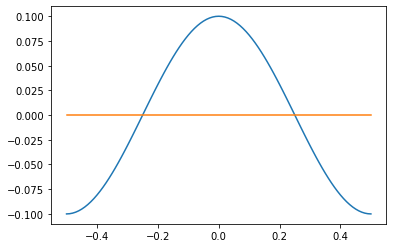

In [169]:
# plot the periodic potential using Fourier coefficients
Vz = expqnz@FCoeffs
plt.plot(zz,Vz.real)
plt.plot(zz,Vz.imag)

In [170]:
def FMat(FCoeffs, nmax):
    FCoeffs0 = FCoeffs
    dB = 2*nmax+1
    MM = np.zeros([dB,dB])
    dM = len(FCoeffs)//2+1
    for iFc,Fc in enumerate(FCoeffs0):
        MM+=np.diag([Fc]*(dB-np.abs(-dM+iFc+1)),-dM+iFc+1)
    return MM # +MM.T

def Hband(nmax,k,FCoeffs):
    nn = np.arange(-nmax,nmax+1)
    HH = np.diag(ϵkG(k,nn))
    HH+= FMat(FCoeffs, nmax)
    return HH

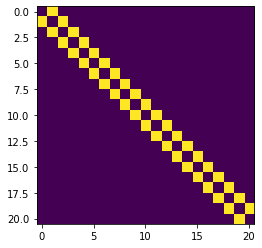

In [171]:
plt.imshow(FMat(FCoeffs, nmax))

In [172]:
k=0
Hb = Hband(nmax,k,FCoeffs)

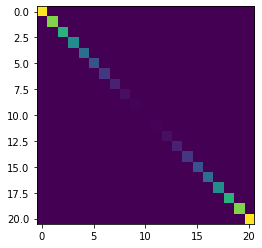

In [173]:
plt.imshow(Hb)

In [174]:
Ebands=[]
for k in kk:
    Hb = Hband(nmax,k,FCoeffs)
    ee, uu = np.linalg.eigh(Hb)
    Ebands.append(ee)
    
Ebands=np.array(Ebands)

ΔE = 0.1, |V_G/2| = 0.025


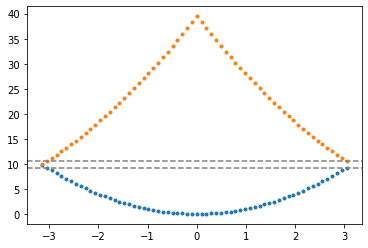

In [182]:
# plot the first two bands
for ni,n in enumerate(nn[:2]):
    plt.plot(kk,Ebands[:,ni],'.')
    
# energy gap between 1st and 2nd band
plt.axhline(y=Ebands[-1,0], ls='--', color="gray")
plt.axhline(y=Ebands[-1,1], ls='--', color="gray")

print(f'ΔE = {Ebands[0,1] - Ebands[0,0]:.3}, |V_G/2| = {abs(FCoeffs[-1]/2):3}')

#plt.ylim([9,10])

In [165]:
# real-Fourier space transform

nn = np.arange(-nmax,nmax+1)

expqnz= np.exp(1j*2*np.pi*np.outer(zz,nn))

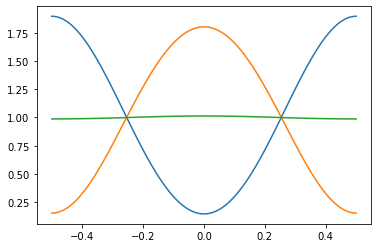

In [166]:
# plot the real space wave function for an eigenstate

for iz in range(3):
    uz = expqnz@uu[:,iz]
    plt.plot(zz,np.abs(uz)**2)